In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100
R = np.arange(10, 110, 10)
E = [0, 20, 40]
n_epochs = 30

In [3]:
def train(input_vectors):
    weights = np.zeros((input_vectors.shape[1], input_vectors.shape[1]))
    for i in range(input_vectors.shape[0]):
        a = input_vectors[i]
        a = np.expand_dims(a, 1)
        weights += np.matmul(a, a.T)
    weights -= input_vectors.shape[0]*np.identity(input_vectors.shape[1])
    return weights

In [4]:
def activation_function(a):
    if a > 0:
        return 1
    else:
        return -1
activation_function = np.vectorize(activation_function)

In [5]:
def add_noise(a, prob, zero=False):
    a = a.copy()
    choices = np.random.choice(np.arange(a.shape[0]), size=int(prob*a.shape[0]), replace=False)
    for choice in choices:
        if zero:
            a[choice] = 0
        else:
            a[choice] *= -1
    return a

In [6]:
def predict(a, weights):
    a = a.copy()
    a = np.expand_dims(a, 1)
    z = np.matmul(a.T, weights)
    z = np.squeeze(z, 0)
    a = activation_function(z)
    return a

In [7]:
def evaluate(pred, actual):
    return len(np.where(pred == actual)[0]) / pred.shape[0]

In [8]:
results_with_noise = {}
for e in E:
    results_with_noise[e] = []
    for r in R:
        epochs_results = []
        for epoch in range(n_epochs):
            result = 0
            input_vectors = np.zeros((r, N))
            for i in range(r):
                input_vectors[i] = np.where(np.random.randint(0, 2, N) != 0, 1, -1)
            weights = train(input_vectors)
            for i in range(r):
                a = add_noise(input_vectors[i], prob=e/100)
                a = predict(a, weights)
                result += evaluate(a,  input_vectors[i])
            epochs_results.append(result / r)
        results_with_noise[e].append((np.mean(epochs_results), np.std(epochs_results)))

In [9]:
df = pd.DataFrame()
for key in results_with_noise.keys():
    for i in range(1, 11):
        df = df.append(
            pd.Series({
            'mean': results_with_noise[key][i-1][0], 
            'std': results_with_noise[key][i-1][1]
            }, 
                name='{}% noise - {} records'.format(key, i*10)
            )
        )

In [10]:
df

,mean,std
0% noise - 10 records,0.999600,0.000757
0% noise - 20 records,0.989317,0.004128
0% noise - 30 records,0.966956,0.004866
0% noise - 40 records,0.945358,0.005603
0% noise - 50 records,0.922807,0.003470
0% noise - 60 records,0.901667,0.004659
0% noise - 70 records,0.884271,0.003744
0% noise - 80 records,0.867413,0.003464
0% noise - 90 records,0.854522,0.003848
0% noise - 100 records,0.839763,0.003303


<ipython-input-11-efeba14acc90>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(R)


Text(0.5, 0, 'Number of Vectors')

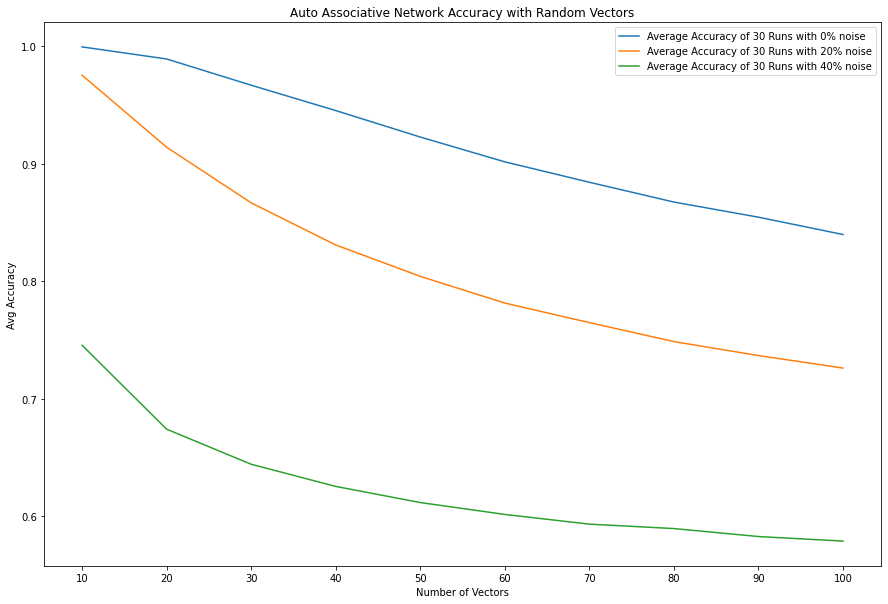

In [11]:
results_means = {}
for key in results_with_noise.keys():
    results_means[key] = []
    for r in range(len(R)):
        results_means[key].append(results_with_noise[key][r][0])
plt.figure(figsize=(15, 10))
for key in results_means.keys():
    plt.plot(results_means[key], label='Average Accuracy of 30 Runs with {}% noise'.format(key))
plt.legend()
plt.title('Auto Associative Network Accuracy with Random Vectors')
plt.ylabel('Avg Accuracy')
plt.gca().set_xticklabels(R)
plt.gca().set_xticks(np.arange(10))
plt.xlabel('Number of Vectors')